In [1]:
import sys
sys.path.append('C:\\Users\\hugo\\OneDrive\\Documents\\Quantitative Finance\\Thesis\\Code\\src')
import pandas as pd
import time

from src.classes import DataImporter
from src import SABR
from src.SABR_IV_approximators import Hagan, AntonovApprox, AntonovExact, AntonovANN

import matplotlib.pyplot as plt

import helperfunctions as hf
# Supress numpy warnings
import warnings
warnings.filterwarnings("ignore")

data_importer = DataImporter()#r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\spx.csv")

In [52]:
save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"
data_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Data"
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

In [40]:
surface = data_importer.surface_date(20190805, n_strikes=25, strike_bounds=(.4,1.6))
surface = surface[surface['days'] >= 7]

In [82]:
hagan = SABR.calibrate_surface(surface, Hagan())
ann = SABR.calibrate_surface(surface, AntonovANN())
antonov = SABR.calibrate_surface(surface, AntonovApprox())

No strikes under ATM
No strikes under ATM
No strikes under ATM
No strikes under ATM
No strikes under ATM
No strikes under ATM
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
No strikes under ATM
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
No strikes under ATM
Error in least squares: Residuals are not finite in the initial point.
Try default starting values
nan
0.5
nan
nan
(0.8892525084183259, 1)


In [46]:
hagan = hagan.set_index('T')
ann = ann.set_index('T')
antonov = antonov.set_index('T')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


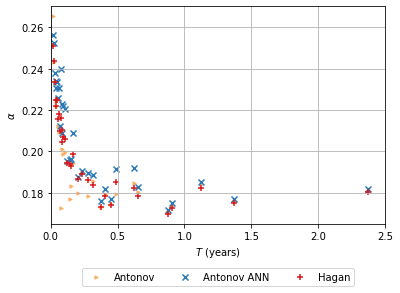

In [66]:
ax = plt.subplot()
plt.scatter(antonov['days']/365, antonov['alpha'], marker='>', s=10, color=colors[1])
plt.scatter(ann['days']/365, ann['alpha'], marker='x', color=colors[3])
plt.scatter(hagan['days']/365, hagan['alpha'], marker='+', color=colors[0])

plt.xlim(0,2.5)
plt.xlabel('$T$ (years)')
plt.ylabel(r'$\alpha$')

labels = ['Antonov', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid()

plt.savefig(save_path + '/spx_surface_alpha.eps', bbox_inches='tight')

# plt.plot(ann['alpha'], marker='<')
# plt.plot(antonov['alpha'], marker='<')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


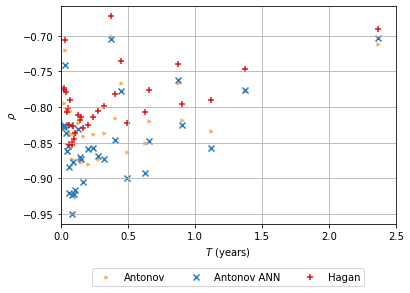

In [67]:
ax = plt.subplot()
plt.scatter(antonov['days']/365, antonov['rho'], marker='>', s=10, color=colors[1])
plt.scatter(ann['days']/365, ann['rho'], marker='x', color=colors[3])
plt.scatter(hagan['days']/365, hagan['rho'], marker='+', color=colors[0])

plt.xlim(0,2.5)
plt.xlabel('$T$ (years)')
plt.ylabel(r'$\rho$')

labels = ['Antonov', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid()

plt.savefig(save_path + '/spx_surface_rho.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


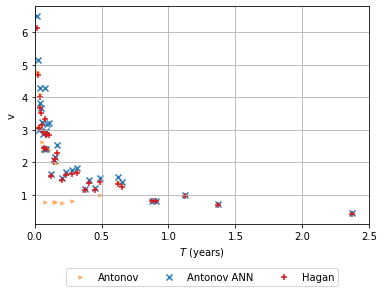

In [68]:
ax = plt.subplot()
plt.scatter(antonov['days']/365, antonov['v'], marker='>', s=10, color=colors[1])
plt.scatter(ann['days']/365, ann['v'], marker='x', color=colors[3])
plt.scatter(hagan['days']/365, hagan['v'], marker='+', color=colors[0])

plt.xlim(0,2.5)
plt.xlabel('$T$ (years)')
plt.ylabel(r'v')

labels = ['Antonov', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid()

plt.savefig(save_path + '/spx_surface_v.eps', bbox_inches='tight')

In [87]:
hagan.time.mean()

0.0728814240657922

In [88]:
ann.time.mean()

0.18242126522642194

In [89]:
antonov.time.mean()

25.576296746730804